- Data preprocess without data augmentation 

### Setting the scene

In [60]:
!pip install matplotlib

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Counter
import os
import random
import re
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from collections import Counter
import subprocess
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string

[nltk_data] Downloading package punkt to /Users/evangelia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- We will apply only basic NLP Preprocess

In [62]:
# define as global variable the folder named "data"
# Create a directory named 'data' if it doesn't exist
os.makedirs('data', exist_ok=True)
# Download the CSV file into the 'data' folder
!wget -O data/incidents_train.csv https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
# Load the dataset from the 'data' folder
data = pd.read_csv('data/incidents_train.csv', index_col=0)

--2024-11-25 17:31:46--  https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12866710 (12M) [text/plain]
Saving to: ‘data/incidents_train.csv’

data/incidents_trai 100%[===================>]  12,27M  2,00MB/s    in 8,7s    

2024-11-25 17:31:55 (1,41 MB/s) - ‘data/incidents_train.csv’ saved [12866710/12866710]



In [63]:
data # preview dataset 

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022\n\n \n High - Class I\n\n Produc...,fraud,prepared dishes and snacks,inspection issues,pizza
5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5082 non-null   int64 
 1   month             5082 non-null   int64 
 2   day               5082 non-null   int64 
 3   country           5082 non-null   object
 4   title             5082 non-null   object
 5   text              5082 non-null   object
 6   hazard-category   5082 non-null   object
 7   product-category  5082 non-null   object
 8   hazard            5082 non-null   object
 9   product           5082 non-null   object
dtypes: int64(3), object(7)
memory usage: 436.7+ KB


- No null values 

- check duplicate values 

In [65]:
data[data.duplicated(keep=False)]

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
572,2011,9,21,ca,Certain Gatorade brand products are being reca...,Notice This archive of previously issued food ...,organoleptic aspects,non-alcoholic beverages,spoilage,sport drink
573,2011,9,21,ca,Certain Gatorade brand products are being reca...,Notice This archive of previously issued food ...,organoleptic aspects,non-alcoholic beverages,spoilage,sport drink
689,2012,8,8,ca,Various milk may contain extraneous material,Various milk may contain extraneous material R...,foreign bodies,"meat, egg and dairy products",foreign bodies,milk
691,2012,8,8,ca,Various milk may contain extraneous material,Various milk may contain extraneous material R...,foreign bodies,"meat, egg and dairy products",foreign bodies,milk
707,2012,9,25,ca,Certain TRADER JOE'S brand NUT BUTTERS may con...,Notice This archive of previously issued food ...,biological,"nuts, nut products and seeds",salmonella,walnuts
709,2012,9,25,ca,Certain TRADER JOE'S brand NUT BUTTERS may con...,Notice This archive of previously issued food ...,biological,"nuts, nut products and seeds",salmonella,walnuts
712,2012,9,27,ca,Various beef products may contain E. coli O157...,Notice This archive of previously issued food ...,biological,"meat, egg and dairy products",escherichia coli,beef products
714,2012,9,27,ca,Various beef products may contain E. coli O157...,Notice This archive of previously issued food ...,biological,"meat, egg and dairy products",escherichia coli,beef products
716,2012,10,1,ca,Certain Nestle brand Chocolate Peanut Butter I...,Notice This archive of previously issued food ...,biological,ices and desserts,salmonella,ice cream
717,2012,10,1,ca,Certain Nestle brand Chocolate Peanut Butter I...,Notice This archive of previously issued food ...,biological,ices and desserts,salmonella,ice cream


- We have some duplicated data we will remove them 

In [66]:
data = data[~data.duplicated(keep=False)]
data

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022\n\n \n High - Class I\n\n Produc...,fraud,prepared dishes and snacks,inspection issues,pizza
5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


- Check balance-imbalance of classes 

In [67]:
def print_column(incidents: pd.DataFrame, column: str, num_examples: int = 10):
    """
    Analyzes and visualizes the distribution of unique values in a specified column of a pandas DataFrame.

    :param incidents: pd.DataFrame
        The input DataFrame containing the data to be analyzed.
    :param column: str
        The column name in the DataFrame to analyze and visualize.
    :param num_examples: int, optional (default=10)
        The number of top unique values and their counts to display in the console.
    
    :return: None
        The function outputs a bar chart and prints the top unique values to the console.
    """
    # Attempt to extract all unique values in the column.
    # If column values are lists or arrays, flatten them before finding unique values.
    try:
        values = np.unique(np.concatenate(incidents[column].values))
    except ValueError:
        values = np.unique(incidents[column].values)
    
    # Count the occurrences of each unique value in the column.
    counts = np.array([sum([v in label for label in incidents[column].values]) for v in values])
    
    # Sort values by their frequency in descending order.
    idx = np.argsort(counts)[::-1]
    values = values[idx]
    counts = counts[idx]

    # Plot a bar chart of the unique value counts.
    num_values = len(counts)
    plt.bar(range(num_values), counts)

    # Adjust x-axis labels for readability.
    if num_values <= 25:
        plt.xticks(range(num_values), values, rotation=90)
    else:
        plt.xticks([], [], rotation=90)
    
    # Print the column name and the total number of unique values.
    print(f'Column "{column}" (n = {len(values):d}):\n')

    # Print the top `num_examples` unique values and their counts.
    for v, n in zip(values[:num_examples], counts[:num_examples]):
        print(f'  {v}:{" "*(50-len(v))}{n:5d}')

Column "hazard-category" (n = 10):

  allergens:                                          1852
  biological:                                         1719
  foreign bodies:                                      557
  fraud:                                               369
  chemical:                                            285
  other hazard:                                        132
  packaging defect:                                     54
  organoleptic aspects:                                 51
  food additives and flavourings:                       24
  migration:                                             3


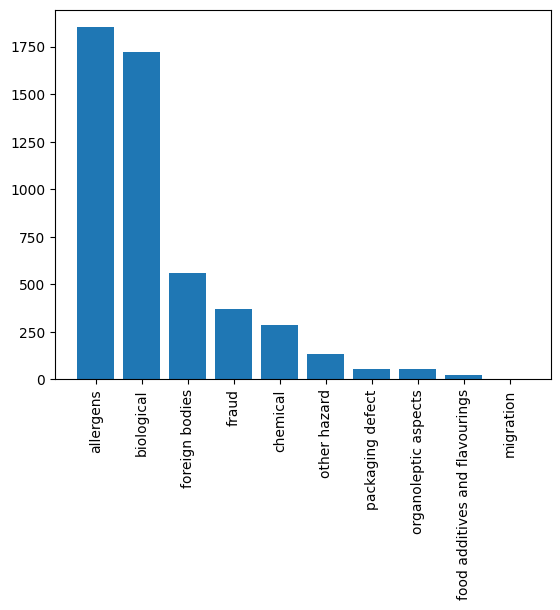

In [68]:
print_column(data, 'hazard-category')

- We can observe the Imbalance for the class`hazard-category.
    - Because the similar plots are appered for the augmented data analysis we will not provide many comments for each plot to leverage time.

Column "hazard" (n = 128):

  listeria monocytogenes:                              659
  salmonella:                                          617
  milk and products thereof:                           588
  nuts:                                                238
  escherichia coli:                                    229
  cereals:                                             214
  peanuts and products thereof:                        209
  eggs and products thereof:                           208
  cereals containing gluten and products thereof:      207
  plastic fragment:                                    204
  other:                                               183
  soybeans and products thereof:                       170
  metal fragment:                                      155
  sulphur dioxide:                                     111
  inspection issues:                                   101
  sulphur dioxide and sulphites:                        93
  glass fragment:           

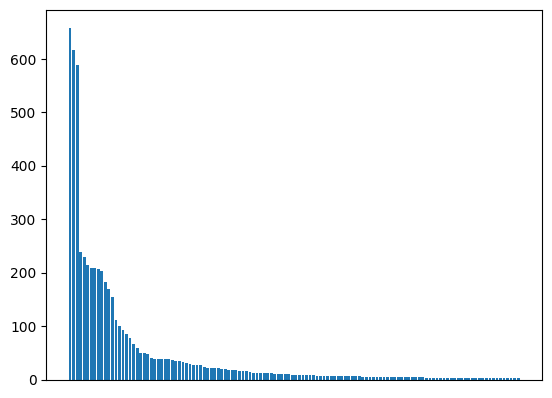

In [69]:
print_column(data, 'hazard',128)

Column "product-category" (n = 22):

  meat, egg and dairy products:                       1414
  cereals and bakery products:                         667
  fruits and vegetables:                               533
  prepared dishes and snacks:                          469
  seafood:                                             268
  soups, broths, sauces and condiments:                262
  nuts, nut products and seeds:                        260
  ices and desserts:                                   220
  cocoa and cocoa preparations, coffee and tea:        210
  alcoholic beverages:                                 191
  confectionery:                                       170
  non-alcoholic beverages:                             132
  dietetic foods, food supplements, fortified foods:   131
  herbs and spices:                                    123
  other food product / mixed:                           55
  pet feed:                                             20
  fats and oils:   

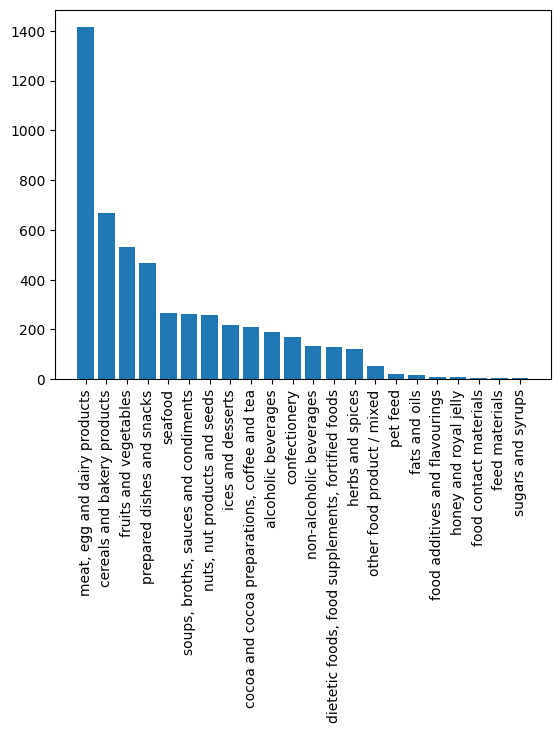

In [70]:
print_column(data, 'product-category',22)

Column "product" (n = 1022):

  chicken:                                             303
  beef:                                                272
  cheese:                                              229
  chocolate:                                           206
  ice cream:                                           183
  nuts:                                                158
  chicken based products:                              136
  milk:                                                129
  sauce:                                               124
  cakes:                                               116
  sausage:                                             108
  beef meat:                                           101
  ready to eat - cook meals:                            79
  cookies:                                              78
  salads:                                               74
  pork meat:                                            72
  bars:                   

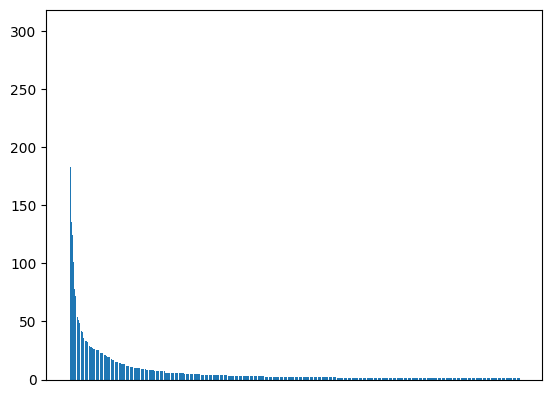

In [71]:
print_column(data, 'product',1022)

- General comment all classes has imbalance. 

### NLP Standard Preprocess
- Text preprocessing is essential to ensure `clean`, `consistent`, and `semantically meaningful input` for NLP models, ultimately `improving` their `performance, interpretability, and computational efficiency`.

- Preprocessing Steps of the function `preprocess_dataframe_column` (Controlled by params):
    - Lowercase Conversion: Standardizes text by converting to lowercase.
    - Punctuation Removal: Removes all punctuation marks.
    - Stopword Removal: Removes common words that add little meaning (e.g., "the", "is").
    - Number Removal: Eliminates numeric tokens.
    - Lemmatization: Converts words to their base forms (e.g., "running" → "run").
    - Stemming (Optional): Reduces words to their root forms (e.g., "running" → "run"), used if lemmatization is disabled.

In [72]:
def nlp_preprocess_dataframe(
    df,
    column,
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True,
    remove_numbers=True,
    lemmatization=True,
    stemming=True
):
    """
    Preprocesses a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to preprocess.
        column (str): Name of the column to preprocess.
        lowercase (bool): Convert text to lowercase. Default is True.
        remove_punctuation (bool): Remove punctuation. Default is True.
        remove_stopwords (bool): Remove common stopwords. Default is True.
        remove_numbers (bool): Remove numeric tokens. Default is True.
        lemmatization (bool): Apply lemmatization. Default is True.
        stemming (bool): Apply stemming. Default is True.

    Returns:
        None: The function directly modifies the input DataFrame.
    """
    # Initialize tools
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    def preprocess_text(text):
        if pd.isnull(text):  # Handle NaN values
            return text
        # Tokenize the text
        tokens = word_tokenize(str(text))

        # Convert to lowercase
        if lowercase:
            tokens = [token.lower() for token in tokens]

        # Remove punctuation
        if remove_punctuation:
            tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        if remove_stopwords:
            tokens = [token for token in tokens if token not in stop_words]

        # Remove numbers
        if remove_numbers:
            tokens = [token for token in tokens if not token.isdigit()]

        # Apply lemmatization
        if lemmatization:
            tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Apply stemming
        if stemming:
            tokens = [stemmer.stem(token) for token in tokens]

        # Join tokens back to a single string
        return ' '.join(tokens)

    # Apply preprocessing directly to the specified column
    df[column] = df[column].apply(preprocess_text)

In [73]:
data

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022\n\n \n High - Class I\n\n Produc...,fraud,prepared dishes and snacks,inspection issues,pizza
5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


In [74]:
# Call the function to preprocess a specific column
nlp_preprocess_dataframe(
    data,               # DataFrame
    column="title",           # Column to preprocess
    lowercase=True,           # Convert to lowercase
    remove_punctuation=True,  # Remove punctuation
    remove_stopwords=True,    # Remove stopwords
    remove_numbers=True,      # Remove numeric tokens
    lemmatization=True,       # Apply lemmatization
    stemming=True             # Apply Stemming
)

nlp_preprocess_dataframe(
    data,               # DataFrame
    column="text",            # Column to preprocess
    lowercase=True,           # Convert to lowercase
    remove_punctuation=True,  # Remove punctuation
    remove_stopwords=True,    # Remove stopwords
    remove_numbers=True,      # Remove numeric tokens
    lemmatization=True,       # Apply lemmatization
    stemming=True             # Apply stemming
)

/var/folders/br/6xtfsjcd1pld8d58t5wwkmcr0000gn/T/ipykernel_29843/3578118381.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(preprocess_text)


In [75]:
data

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
0,1994,1,7,us,recal notif fsis-024-94,case number 024-94 date open 07/01/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,recal notif fsis-033-94,case number 033-94 date open 10/03/1994 date c...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,recal notif fsis-014-94,case number 014-94 date open 03/28/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,recal notif fsis-009-94,case number 009-94 date open 03/04/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,recal notif fsis-001-94,case number 001-94 date open 01/07/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,import biscuit may contain allergen peanut,import biscuit may contain allergen peanut cen...,allergens,cereals and bakery products,peanuts and products thereof,biscuits
5980,2022,7,28,us,danni ’ sub pizza recal meat pizza product pro...,023-2022 high class produc without benefit ins...,fraud,prepared dishes and snacks,inspection issues,pizza
5981,2022,7,29,us,lyon magnu voluntarili recal nutrit beverag pr...,fresno calif. – juli – lyon magnu llc “ lyon m...,biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages
5982,2022,7,30,us,conagra brand inc. recal frozen beef product d...,025-2022 high class misbrand mislabel unreport...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products


## Sava  NLP preprocessed Data

- We will save the data to teh folder `data` in the file `data_nlp_incidents_train.csv`

In [76]:
# Define the folder and file path
folder_path = "data"
file_path = os.path.join(folder_path, "data_nlp_incidents_train.csv")
# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
# Save your data to the specified file
data.to_csv(file_path, index=False)
print(f"File saved to {file_path}")

File saved to data/data_nlp_incidents_train.csv
